Probability allows us to make decisions based on what we know or prior events. While we cannot know the future, we can use statistical inference to calculate the probability of an event or prediction. There are many different statistical methods that can be applied to data of events in order to asses their likelihood. This includes using probability distribution to calculate random event outcomes, empirical probability to assess the outcome based on knowns, and conditional probability based on previous observations (Firdous 2023).

We can leverage probability in many real world situations to make informed decisions and analysis. In the Finance sector, we use probability to predict return or loss on an investment. Aerospace engineers can use probability to determine the amount of debris a craft may encounter in orbit (Australian Space Academy 2023). Social sciences use probability based on collected data to predict if individual in a certain region or a certain socioeconomic background has access to healthcare. 

Python allows us to calculate probability and calculate it with packages like scipy. This example of a simple probability and binomial distribution is just one of many ways we can use python to investigate probability. More advanced examples like making predictions of disease include training a model and meauring with classifier. 


In [4]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom 

In [5]:
#read csv data
breed = pd.read_csv('AKC Breed Info.csv')
intelligence = pd.read_csv('dog_intelligence.csv')

In [6]:
#data to dataframe
breed = pd.DataFrame(breed)
intelligence = pd.DataFrame(intelligence)

In [9]:
#merge dataframes
df = breed.merge(intelligence, left_on='Breed', right_on='Breed')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_x             105 non-null    int64 
 1   Breed               105 non-null    object
 2   height_low_inches   105 non-null    object
 3   height_high_inches  105 non-null    object
 4   weight_low_lbs      105 non-null    object
 5   weight_high_lbs     105 non-null    object
 6   index_y             105 non-null    int64 
 7   Classification      105 non-null    object
 8   obey                96 non-null     object
 9   reps_lower          105 non-null    int64 
 10  reps_upper          105 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 9.8+ KB


In [12]:
df.head()

,index_x,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,index_y,Classification,obey,reps_lower,reps_upper
0,0,Akita,26,28,80,120,102,Average Working/Obedience Intelligence,50%,26,40
1,2,Bernese Mountain Dog,23,27,85,110,26,Excellent Working Dogs,85%,5,15
2,3,Bloodhound,24,26,80,120,130,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
3,4,Borzoi,26,28,70,100,131,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
4,5,Bullmastiff,25,27,100,130,124,Fair Working/Obedience Intelligence,30%,41,80


In [15]:
df['Classification'].unique()

array(['Average Working/Obedience Intelligence', 'Excellent Working Dogs',
       'Lowest Degree of Working/Obedience Intelligence ',
       'Fair Working/Obedience Intelligence',
       'Above Average Working Dogs', 'Brightest Dogs'], dtype=object)

In [21]:
#use dataset to find the probability of a dog having brightest intelligence and having a low weight over 50
big_and_bright = df[(df['weight_low_lbs']>'50') & (df['Classification']=='Brightest Dogs')]

In [22]:
big_and_bright.count()

index_x               4
Breed                 4
height_low_inches     4
height_high_inches    4
weight_low_lbs        4
weight_high_lbs       4
index_y               4
Classification        4
obey                  4
reps_lower            4
reps_upper            4
dtype: int64

In [27]:
#probabilit of a big and bright dog
bb_prob = len(big_and_bright)/len(df)
bb_prob *100

3.8095238095238098

We used the kaggle data set on dog breed data and intellgence measures to determine the probability of a dog breed being over 50 pounds AND being in the brightest dogs category. We get a probability of 3.8% and plot the binomial distibution below for this proabaility in a set of 150 dog breeds. 

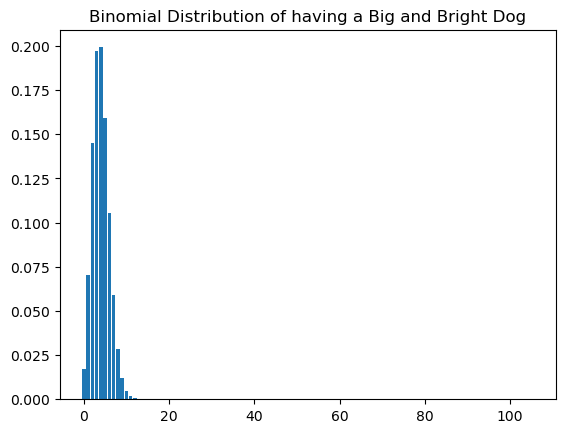

In [31]:
#define n and p where n is the number of times in the experiment and p is the probability of success
n = len(df)
p = bb_prob
# define r values
r_values = list(range(n + 1)) 
# plot binomial distribution 
dist = [binom.pmf(r, n, p) for r in r_values ] 
plt.bar(r_values, dist) 
plt.title('Binomial Distribution of having a Big and Bright Dog')
plt.show()

Australian Space Academy. (2013). Asteroid-satellite collision probability. https://www.spaceacademy.net.au/watch/neo/axgeosat.htm 
    
Devastator, T. (2023, January 21). Dogs Intelligence and size. Kaggle. https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size 

Firdous, N. (2023, February 27). Understanding probability: 7 essential concepts for data science with python examples. Medium. https://medium.com/@naghma2404/understanding-probability-7-essential-concepts-for-data-science-with-python-examples-9c979767d0f6

GfG. (2020, July 16). Python - binomial distribution. GeeksforGeeks. https://www.geeksforgeeks.org/python-binomial-distribution/ 
